## 딥러닝 영상처리 이해 (동아대)
# 신경망 개념

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 주어진 문제 : 키와 몸무게로 영어성적을 구한다(예측한다)

In [7]:
data = np.array([[160,50], [171,77], [150,32]])
data

array([[160,  50],
       [171,  77],
       [150,  32]])

In [8]:
w1 = 2
w2 = 1

In [9]:
w = np.array([2,1]) # 임의로 가중치를 설정했다
w

array([2, 1])

In [10]:
data*w

array([[320,  50],
       [342,  77],
       [300,  32]])

In [11]:
(data*w).sum(axis=1)

array([370, 419, 332])

In [12]:
data@w # 행렬곱을 이용하여 계산

array([370, 419, 332])

### 중간층 추가시 계산법
- 노드(동그라미)가 3개인 중간층 하나를 추가함

In [13]:
data = np.array([[160,50], [171,77], [150,32]])
data

array([[160,  50],
       [171,  77],
       [150,  32]])

In [14]:
W1 = np.ones([2,3])
W1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [15]:
y1 = data@W1
y1

array([[210., 210., 210.],
       [248., 248., 248.],
       [182., 182., 182.]])

In [16]:
W2 = np.array([1., 1., 1.]) # W2 = np.ones([3,1])
W2

array([1., 1., 1.])

In [17]:
y = y1@W2
y

array([630., 744., 546.])

In [18]:
y = (data@W1)@W2
y

array([630., 744., 546.])

### 절편값 추가시

In [19]:
W1 = np.ones([2,3])
b1 = np.ones(3) # 오른쪽 동그라미 갯수만큼 잡으면 된다
W1, b1

(array([[1., 1., 1.],
        [1., 1., 1.]]),
 array([1., 1., 1.]))

In [20]:
y1 = data@W1 + b1
y1

array([[211., 211., 211.],
       [249., 249., 249.],
       [183., 183., 183.]])

In [23]:
W2 = np.ones(3) # np.ones([3,1])
b2 = 1.

In [24]:
y = y1@W2 + b2
y

array([634., 748., 550.])

In [25]:
y = (data@W1 + b1)@W2 + b2
y

array([634., 748., 550.])

### 활성화 함수 적용

- sigmoid 활성화 함수

In [32]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

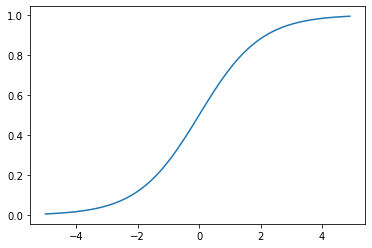

In [33]:
x = np.arange(-5,5,0.1)
plt.plot(x, sigmoid(x))

In [34]:
y1 = data@W1 + b1
y1

array([[211., 211., 211.],
       [249., 249., 249.],
       [183., 183., 183.]])

In [35]:
y1 = sigmoid(y1)
y1

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [36]:
# 출력층에도 시그모이드 적용한 경우
y = sigmoid(y1@W2 + b2)
y

array([0.98201379, 0.98201379, 0.98201379])

- ReLU 활성화 함수

In [37]:
np.maximum(3,1)

3

In [38]:
np.maximum([1,2,3], [3,2,1])

array([3, 2, 3])

In [39]:
np.maximum([1,-2,3,-4], 0)

array([1, 0, 3, 0])

In [40]:
y1 = data@W1 + b1
y1

array([[211., 211., 211.],
       [249., 249., 249.],
       [183., 183., 183.]])

In [41]:
y1 = np.maximum(y1, 0)
y1

array([[211., 211., 211.],
       [249., 249., 249.],
       [183., 183., 183.]])

### 중간층이 여러개 일때
- 첫번째 중간층 : 노드가 5개, 활성화함수가 sigmoid
- 두번째 중간층 : 노드가 10개, 활성화함수가 ReLU

In [42]:
data = np.array([[160,50], [171,77], [150,32]])
data

array([[160,  50],
       [171,  77],
       [150,  32]])

In [43]:
W1 = np.ones([2,5])
b1 = np.ones(5)

y1 = sigmoid(data@W1 + b1)
y1

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [45]:
W2 = np.ones([ 5, 10])
b2 = np.ones(  10)

y2 = np.maximum(y1@W2 + b2, 0) # ReLU 적용
y2

array([[6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.]])

- 출력층에 sigmoid 를 적용하면 분류 문제가 된다

In [47]:
W3 = np.ones(10) # np.ones([10,1])
b3 = 1.

y = sigmoid(y2@W3 + b3) # sigmoid 를 적용하면 0~1 사이의 확률값이 된다 (0이면 강아지, 1이면 고양이)
y

array([1., 1., 1.])

### 크로스 엔트로피 계산법 (분류 문제)

In [49]:
-np.log(0.3)

1.2039728043259361

In [50]:
-np.log(0.9)

0.10536051565782628

In [51]:
-np.log(0)

<ipython-input-51-bffa671ebd70>:1: RuntimeWarning: divide by zero encountered in log
  -np.log(0)


inf

In [52]:
-np.log(1)

-0.0

### 텐서플로 설치
- pip install tensorflow

In [53]:
import tensorflow as tf

In [54]:
from tensorflow import keras

In [55]:
tf.__version__

'2.6.1'

In [56]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
# GPU드라이버, CUDA, cuDNN

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12978416999645952750]

### 케라스 기본 적용

In [57]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(5,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

In [58]:
model.compile(loss='mse' , optimizer='rmsprop')

In [59]:
model.fit(X, y, batch_size=32, epochs=100) # 훈련은 이걸로 끝난다

NameError: name 'X' is not defined

In [ ]:
pred_y = model.predict(X_test)

In [61]:
X = np.random.randn(100,5) # 100은 샘플갯수, 5는 input_shape=(5,)
X.shape

(100, 5)

In [63]:
y = np.random.randn(100) # 목표값, 타겟값, 정답
y.shape

(100,)

In [64]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(5,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

In [65]:
model.compile(loss='mse' , optimizer='rmsprop')

In [66]:
model.fit(X, y, batch_size=32, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 0.9426
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9014
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8096
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7979
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7725
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7568
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7421
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7273
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7161
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7159
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6871
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6757
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

In [67]:
model.history.history

{'loss': [0.9426130056381226,
  0.9013582468032837,
  0.8095909953117371,
  0.7978848814964294,
  0.7725285291671753,
  0.75677889585495,
  0.7421416640281677,
  0.7272534966468811,
  0.716072678565979,
  0.7159082293510437,
  0.6870890259742737,
  0.6756759881973267,
  0.6695433259010315,
  0.680518388748169,
  0.646952211856842,
  0.6327953934669495,
  0.6445014476776123,
  0.6417238712310791,
  0.6163733005523682,
  0.6077516078948975,
  0.6053448915481567,
  0.5885872840881348,
  0.5725355744361877,
  0.5788456201553345,
  0.568329930305481,
  0.5633188486099243,
  0.5428847670555115,
  0.5410909056663513,
  0.5392556190490723,
  0.5350940227508545,
  0.527910590171814,
  0.513262927532196,
  0.5020962357521057,
  0.5055521726608276,
  0.49608883261680603,
  0.5008193254470825,
  0.49102333188056946,
  0.49053603410720825,
  0.4674782454967499,
  0.49051982164382935,
  0.4574863910675049,
  0.4635154604911804,
  0.44625183939933777,
  0.4508708119392395,
  0.4335237741470337,
  0.4

Text(0.5, 1.0, 'loss of random data')

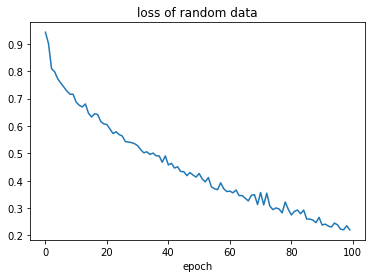

In [69]:
plt.plot(model.history.history['loss'])
plt.xlabel('epoch')
plt.title('loss of random data')